# Radar
## Introduction
Radio detection and ranging (RADAR) is a system which transmit electromagnetic energy to determine the distance (range) to an object.  Compared to electro/optical (passive) sensors which detect and receive natural energy, radar emits and receives its own energy. 

TODO: ADD PICTURES OF RADARS

![electromagnetic_spectrum](images/electromagnetic-spectrum-wavelengths.jpg)  

The wavelength of the transmitted wave is given by:
$$\lambda = c/f $$

where:
* $\lambda$ is the wavelength of the wave in meters
* $c$ is the speed of light in meters/sec
* $f$ is the frequency of the wave in Hz


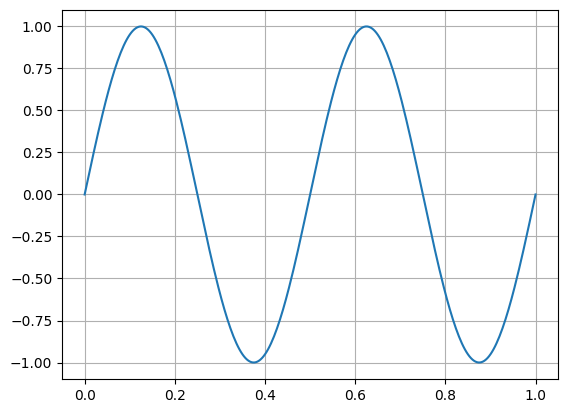

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: Make interactive and label

frequency = 2 # Hz
t = np.linspace(0, 1, 301)
x = np.sin(2 * np.pi * frequency * t)
plt.figure()
plt.plot(t, x)
plt.grid()

Radar often utilizes the following frequency bands:
| frequency band name | frequency range (GHz) | uses |
| ------------------  | --------------------- | ---- | 
| L | 1-2 | x |
| S | 2-4 | x |
| C | 4-8 | x |
| X | 8-12 | x |
| K_u | 12-18 | x |
| K | 18-27 | x |
| K_a | 27-40 | x |
| V | 40-75 | x |
| W | 75-110 | x |
| mmw | 110-300 | x |

Most commonly used frequency band for spaceborne radar is X band.  
![electromagnetic_absorption](images/atmospheric_absorption.jpeg)  



- Introduce waves/wavelengths/reflection principles
- Doppler effect?

## Radar Sytem components

### Discussion on dB
- Overview of decibals and why we use them
### Signal Generators
- Brief overview on waveform generation/types of waveforms
### Filters
- Brief overview on filters
### Mixers
- Brief overview on mixers
### Amplifiers
- Brief overview on amplifiers
### Antennas
- Brief overview on antennas
### Putting it all together
- Discuss radar system topologies (superheterodyne receivers)
- Frequency planning

## Radar Range equation
- Derive the equation
- Derive signal to noise ratio from equation
- Derive equations for to show constraints (max range, ...)
- Discuss losses in system (noise figure, noise temperature, ...)

## Topic: System Design
- Design a radar system given constraints

## Topic: RCS Calibration
- Show how we calibrate for RCS measurements